---
title: Operadores
license: CC-BY-4.0
github: https://github.com/jamasole/Curso-TalentQ-Jupyterlab
subject: Curso
venue: Quantum Spain
authors:
  - name: Javier Mas
    email: javier.mas@usc.es
    corresponding: true
    orcid: 0000-0001-7008-2126
    affiliations:
      - IGFAE-USC
  - name: David Castaño
    email: david.castano@uma.es
    corresponding: true
    orcid: 0000-0001-7008-2126
    affiliations:
      - UMA
math:   
    '\i': '{i}'
    '\bes': '\begin{equation*}'
    '\ees': '\end{equation*}'
    '\O': '{\mathcal O}'
    '\Lin': '\rm L'
    '\Hil': '{\mathcal H}'
    '\braa': '{\langle #1|}'
    '\ket': '{|#1\rangle}'
    '\braket': '{\langle #1|#2\rangle}'
    '\ketbra': '{|#1\rangle\langle #2|}'
    '\tr': '{\rm tr}'
    '\R': '{\mathbb R}' 
    '\C': '{\mathbb C}'
    '\V': '{V}'
---

In [2]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

## Operadores y Matrices

En un espacio vectorial, además de los **vectores**, será esencial entender las **transformaciones** de estos elementos entre sí. 


:::{card}
**Definición**: *operador lineal*

^^^

Un <i>operador lineal</i>  transforma <u>todo vector en otro</u> 

$$
A: \ket{u} ~~\to ~~ \ket{v}   
$$
:::


El apelativo lineal es una condición extremadamente útil, que indica cómo se transforma un vector que es combinación lineal de otros dos

$$
A: \big(\alpha\ket{u} + \beta\ket{w}\big)~~\to ~~ \ket{v} =\alpha A\ket{u} + \beta A\ket{w}
$$ 

:::{admonition} Notación
:class: note

Escribimos también $\ket{v} = A\ket{u} \equiv \ket{Au}$ $~~$ donde $Au=v$ deben entenderse como la etiqueta sinónimas del vector imagen

:::

:::{admonition} Ejemplo
:class: tip

Un <i>operador</i>  fácil de visualizar es el operador de <i>rotación en un plano</i>. Dado un ángulo $\theta \in (0,2\pi)$ el operador $A = R(\theta)$ gira cualquier vector un ángulo $\theta$ en el sentido antihorario

Un vector en  ${\bf u} =  (u_1,u_2)\in {\mathbb R}^2$  es equivalente al número complejo $u = u_1 + i u_2 \in {\mathbb C}$.

    
Escrito en polares, $u=|u|e^{i\phi}$, y sabemos que una rotación de ángulo $\theta$ es equivalente a añadirle dicho  ángulo a la fase 

$$
 v = R(\theta) u = |u| e^{i(\phi + \theta)} =  |u| e^{i\phi } e^{i\theta} = u\cdot e^{i\theta} 
$$
    
Por tanto, rotar un número complejo un ángulo $\theta$ se corresponde con la acción el operador $R(\theta)$
que multiplica cualquier número complejo por la fase $e^{i\theta}$.

    
    
La propiedad fundamental de una rotación es la de mantener invariante el módulo  $|v| = |u|$.    

:::

::::{admonition} Ejercicio
:class: tip

Usando el ejemplo anterior, define una función $R$ en python, que recibe un vector en el plano $(u_1,u_2)$ y devuelve el vector $(v_1,v_2)$ de componentes rotadas un ángulo $\theta$.


:::{dropdown} Solución

```{code-block} python
def R(u1,u2,theta):
   u = u1 + u2*1j
   v = u*np.exp(1j*theta) # u rotado un angulo theta
   return v.real,v.imag
```
:::
::::
 

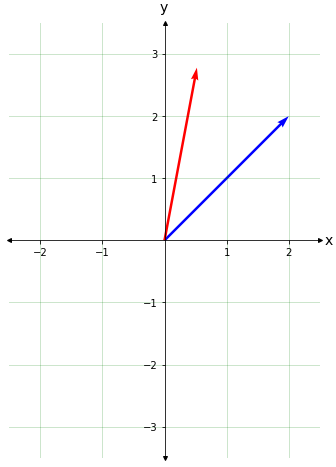

In [4]:
'''ángulo que queremos rotar'''
theta=0.6 

'''vector a rotar'''
u1=2.
u2=2.

#'''v1 y v2 a partir de u1, u2 y theta'''
#def R(u1,u2,theta):
#        u = u1 + u2*1j
#        v = u*np.exp(1j*theta) # u rotado un angulo theta
#        return v.real,v.imag
    
v1,v2 =  R(u1,u2,theta)

''' Representación en el plano complejo '''
v = v1**2+v2**2
tQ.plot_2D_plane(left=-int(abs(v1))-2,right=int(abs(v1))+2,up=int(abs(v2))+1,down=-int(abs(v2))-1)
tQ.draw_vector(u1,u1,vcolor='b')
tQ.draw_vector(v1,v2,vcolor='r')


### Matriz de un operador
<a id='matriz_op'></a>

*Dada una base* $\ket{i}$ sabemos que:

$\Rightarrow $  un vector queda especificado por una *columna de números* 

$$
\ket{v} \sim \begin{pmatrix} v_1 \\ v_2\\ \vdots \\ v_N\end{pmatrix}
$$


$\Rightarrow $  un operador queda definido por una *matriz de números*. 

$$
A \sim \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
$$


En ambos casos, los números son las **componentes** en una base. 

Efectivamente, en una base, la relación $\ket{v} = A\ket{u}$ equivale a una ecuación que relacione las componentes de ambos vectores
$$
v_i = \sum_{j=1}^N A_{ij} u_j  \, .
$$

Esta operación se corresponde con la siguiente *multiplicación de matrices*

$$
\begin{pmatrix}
v_1 \\ v_2 \\ \vdots \\ v_N \end{pmatrix} =  \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
 \begin{pmatrix} 
u_1 \\ u_2 \\ \vdots \\ u_N\end{pmatrix} 
$$

:::{admonition} Ejemplo
:class: tip

Continuando con el ejemplo del operador de rotación en un plano, hemos visto que las componentes de $u = u_1 + i u_2$ y las de $R(\theta)u = v = v_1 + i v_2$ se obtienen mediante la multiplicación por una fase pura 

\begin{eqnarray}
v&=& u e^{i\theta} \\
\end{eqnarray}
    
Vamos a desarrollar cada miembro en cartesianas, separando las partes real e imaginaria
    
\begin{eqnarray}
v_1 + i v_2 &=& (u_1 + iu_2) (\cos \theta + i \sin \theta)  \\
    \rule{0mm}{6mm}
    &=& (\cos\theta \, u_1 - \sin \theta\,  u_2) + i(\sin\theta\,  u_1 + \cos \theta\,  u_2)
\end{eqnarray}
   
es decir las coordenadas del vector origen y el vector rotado imagen se relacionan en la  forma 
\begin{eqnarray}
v_1 = \cos\theta \, u_1 - \sin \theta\,  u_2 ~~~~~~~,~~~~~~~~
v_2 = \sin\theta \, u_1 + \cos \theta\,  u_2     
\end{eqnarray}
que podemos expresar en forma matricial
    
$$
\begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta &\cos\theta\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}
$$    
:::

##   El Espacio Vectorial  $\Lin(\Hil)$ 

El <i>conjunto</i> de **todos** <i>los operadores lineales</i> sobre un espacio vectorial $\Hil$ tiene, de forma natural, una estructura de espacio vectorial que denominamos $\Lin(\Hil)$

En efecto, dados dos operadores,  $A$ y $B$ tanto la suma $C = A+B$ como la multiplicación por un número complejo $D=\lambda A$ son *nuevos operadores* definidos por su acción sobre un vector cualquiera $\ket{v}\in \Hil$

$$
C\ket{v} ~=~ (A + B) \ket{v} = A\ket{v} + B\ket{v}
$$

$$
D\ket{v} ~=~ (\lambda A) \ket{v} = \lambda (A\ket{v})
$$

El elemento neutro es el operador que aniquila cualquier vector

$$
(A + 0)\ket{u} = A\ket{u} + 0\ket{u} = A\ket{u} + 0 = \ket{v}
$$

### Producto externo

$\Lin(\Hil)$ es por tanto, un espacio vectorial cuyos vectores son los operadore lineales sobre $\Hil$. Como para cualquier espacio vectorial, para describir los operadores $A$,  necesitamos una base. 

Resulta que, como vamos a ver, una base $\{ \ket{i}\}$ para describir los vectores  de $\ket{v}\in \Hil$ nos permite definir una base para los operadores $A \in \Lin(\Hil)$ de forma natural. 

Para verlo vamos a definir dos formas de componer dos vectores de $\ket{u},\ket{v} \in \Hil$: el producto interno, y el producto externos. 